<a href="https://colab.research.google.com/github/marigisee/Deep-Learning-UNLP/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica 2

### Ejercicio 1

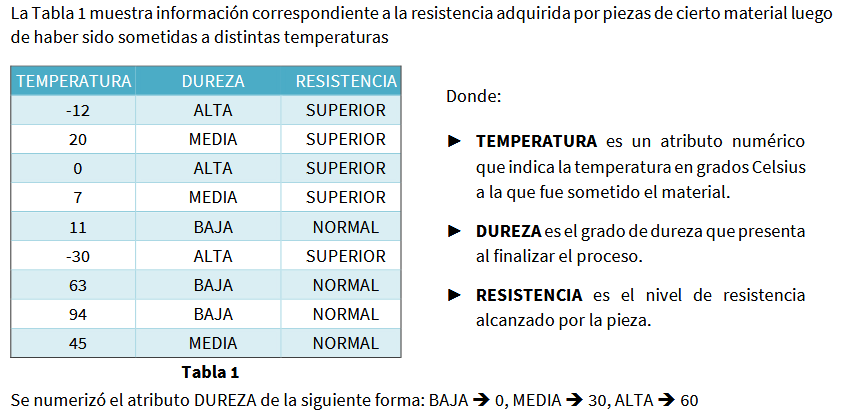


a) Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos TEMPERATURA
y DUREZA y se obtuvo como resultado -0.78. ¿Cómo debe interpretarse este valor?

El coeficiente de correlación lineal nos proporciona información sobre la **relación lineal** entre dos variables.
El coeficiente pertenece al intervalo $[-1,1]$, donde:
* 1 indica una correlación positiva perfecta
* 0 indica que no hay correlación lineal : **no hay una relación lineal** discernible entre las variables.
* -1 indica una correlación negativa perfecta

Debido a que obtuvimos un coeficiente de correlación lineal negativo, es útil analizar el valor absoluto del  mismo para visualizar la **fuerza** de la correlación.

* Valores cercanos a 1 (positivos o negativos) indican una correlación fuerte.
* Valores cercanos a 0 indican una correlación débil.



> Debemos interpretar que existe una correlación lineal debil entre los atributos TEMPERATURA y DUREZA



b) Luego de **numerizar** el atributo DUREZA, los ejemplos fueron utilizados para **entrenar** un perceptrón capaz de predecir correctamente el atributo RESISTENCIA.

Los pesos obtenidos fueron los siguientes:
* $w$ (TEMPERATURA) = $2.386$
* $w$ (DUREZA) = $-2.196$
* $b$ = $-0.023$

¿Cuál será la respuesta del perceptrón para un material sometido a una TEMPERATURA de 9 grados Celsius que presenta una DUREZA=BAJA?
$$9*2.386 + 0*(-2.196) + (-0.023) = 21,451 > 0 → y = 1$$
$$y = 1 → \text{Superior?}$$

### Ejercicio 2

Se desea construir una Red Neuronal, formada por un único Perceptrón, para clasificar fotos de hojas
diferenciando las que corresponden a helechos de las que no. A continuación, se muestran algunas de las
imágenes que se utilizarán en el entrenamiento:

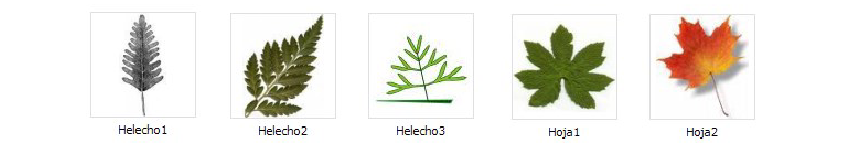

Se analizaron las imágenes y se extrajeron características geométricas representativas. El archivo hojas.csv contiene la cantidad de pixeles correspondientes al perímetro y el área de cada hoja.

#### **Inciso a**

***Utilice los ejemplos del archivo hojas.csv para entrenar un perceptrón que permita reconocer cuando se trata de una hoja de helecho. Utilice una velocidad de aprendizaje (parámetro alfa) de 0.01 y una máxima cantidad de iteraciones MAX_ITE=300.***

---



Primero importamos todas las librerias necesarias además de las clases que contienen las funciones para entrenar al Perceptrón junto con herramientas gráficas

In [4]:

import numpy as np
import time
import pandas as pd

from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron



Leemos el archivo `hojas.csv` y obtenemos los datos del archivo:


*   Nombre de los atributos
*   Valores de los atributos
*   Respuestas esperadas




In [16]:
# Leemos el archivo hojas.csv
datos = pd.read_csv("/content/drive/MyDrive/Deep Learning (UNLP)/Práctica 2/Ejercicios/hojas.csv")
nColum = list(datos.columns.values)
print(datos)

#--- DATOS DE ENTRENAMIENTO ---#
#Selecciono todas las filas y todas las columnas excepto la última
X = np.array(datos.iloc[:,:-1])


#--- SALIDA BINARIA ---#
#Tenemos dos tipos de salida: o es una hoja o un helecho
#Determinamos los siguientes valores:
#--- Hoja = true = 1
#--- Helecho = false = 0
T = datos['Clase'] == 'Hoja'
T = np.array(T * 1)  #lo convierte en binario


      Perimetro   Area    Clase
0    667.997041   3793     Hoja
1    784.246825   2574  Helecho
2    367.747258   3582     Hoja
3    901.595021   5068  Helecho
4    949.175757  12216     Hoja
5    763.269119    980  Helecho
6    197.580736   3370     Hoja
7    799.619408   1669  Helecho
8    452.475180   3585     Hoja
9   1564.482323   2964  Helecho
10   607.327994   6196     Hoja
11  1180.123000   8128     Hoja


Una vez que preparamos las variables necesarias para inicializar el objeto Perceptron, llamamos al constructor con los parámetros de inicialización correspondientes.

Cuando llamamos `ppn.fit(X,T)` estamos entrenando al Perceptron para poder obtener el clasificador lineal.

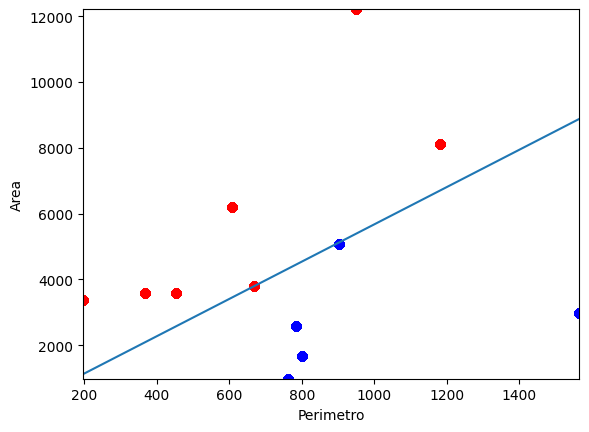

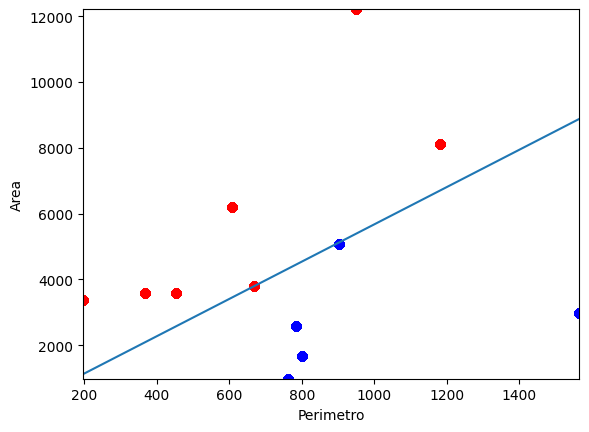

In [30]:
#--- Entrenamiento del perceptrón ---#
ppn = Perceptron(alpha=0.01, n_iter=300, draw=1, title=nColum[0:2], random_state=None)
ppn.fit(X,T)

Una vez determinado el clasificador lineal, podemos llamar a la función
`ppn.predict(X) ` que, dado un array que contiene la información de area y perimetro de hojas, va a determinar de que clase es.
En este caso, le estamos enviando el array con los datos que ya contamos (y utilizamos para entrenar el Perceptrón)




In [31]:
Y = ppn.predict(X)
print("Y = ", Y)
print("T = ", T)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))



Y =  [1 0 1 0 1 0 1 0 1 0 1 1]
T =  [1 0 1 0 1 0 1 0 1 0 1 1]
aciertos =  12
% de aciertos = 100.00 %


#### **Inciso b**

***A partir de los pesos del perceptrón entrenado, indique cuál es la función discriminante obtenida.***


---



Para poder indicar cuál es la función discriminante obtenida, debemos determinar los pesos finales luego de haber entrenado al Perceptrón.
Para hacer eso, debemos analizar los valores del atributo `w_` y `b_` del objeto `ppn`

In [32]:
print("Pesos del modelo (W):")
print(ppn.w_)
print("Bias del modelo (b):")
print(ppn.b_)

Pesos del modelo (W):
[-654.78402749  115.40962346]
Bias del modelo (b):
-0.2607206853243234


Por lo tanto, sea la función que describe la recta $${w_0}*a_1-w_1 a_2 + b=0$$ siendo:


*   $a_1$ = atributo1 → perímetro
*   $a_2$ = atributo2 → diametro



Tenemos entonces la siguiente ecuación que describe la recta final:
$$ \small{ -738,78584055*\text{perimetro}+130,80046094*\text{diametro}-0,11626123482163438=0}
$$

####**Inciso c**

***Calcule manualmente la respuesta del perceptrón si se ingresa una hoja con un perímetro de 770 pixeles y un área de 5000 pixeles.***


---



Para calcular manualmente la respuesta del perceptrón debemos utilizar la siguiente ecuación pero reemplzando los campos perímetro y diametro con los valores correspondientes:
$$ \small{ -738,78584055*\text{perimetro}+130,80046094*\text{diametro}-0,11626123482163438=0}
$$

In [33]:
ppn.w_[0]*770+ppn.w_[1]*5000-ppn.b_

72864.67687070751

El umbral con el que compara la función definida en la clase `ClassPerceptron.py` es 1, teniendo asi que si el resultado de la ecuación es mayor a 1 entonces los datos ingresados corresponden a la clase 1 ó "Hoja" mientras que si el resultado de la ecuación es menor a 1, entonces lo datos ingresados corresponden a la clase 2 ó "Helecho".
Por lo tanto, los datos ingresados corresponden a una **hoja**.

Si quisieramos hacerlo directamente con la funciones, deberiamos crear un arreglo que contenga los datos que queremos que el Perceptron procese y llamar a la función `.predict()`

In [34]:
nuevosDatos = np.array([770,5000])
print("Los datos que el perceptrón va a procesar :")
print(nuevosDatos)
print("El perceptron responde con la siguiente etiqueta:")
print(ppn.predict(nuevosDatos))
print("Donde: 1 → Hoja y 2 → Helecho")

Los datos que el perceptrón va a procesar :
[ 770 5000]
El perceptron responde con la siguiente etiqueta:
1
Donde: 1 → Hoja y 2 → Helecho


Vemos entonces como el Perceptron predijo que los datos ingresados eran de una **hoja**.

#### **Inciso d**

***Realice 50 ejecuciones independientes del entrenamiento de a) utilizando una máxima cantidad de iteraciones MAX_ITE=100. Luego complete el siguiente cuadro considerando sólo los casos exitosos en los que se logró obtener un perceptrón capaz de clasificar correctamente todos los ejemplos. Registre el porcentaje de ejecuciones con un accuracy del 100% y la cantidad de iteraciones promedio empleadas en estas ejecuciones exitosas.***


---



Primero preparamos los parámetros iniciales como la cantidad de iteraciones, cantidade de repeticiones, valores de alfa que vamos a utilizar y opciones de orden y normalización.


In [6]:
from OrdenacionNormalizacion import *
MAX_ITE = 100
REPETICIONES = 50
ALFA = [0.2, 0.005]
ORDEN = ['aleatorio','ascendente','descendente']
NORMALIZAR = ['no','lineal','estadistica']

Los siguientes for anidados calculan las 50 ejecuciones independientes para cada caso.
Es importante remarcar que utilizamos una función llamada `OrdenacionNormalizacion()` que toma los valores de muestra y los valores esperados de salida y:


*   Los normaliza (en caso de ser necesario)
*   Los ordena (en caso de ser necesario)


A continuación adjunto el código de la funcion `OrdenacionNormalizacion()`


In [7]:
import numpy as np
import pandas as pd
from grafica import *

import numpy as np
from sklearn import preprocessing

def OrdenacionNormalizacion(X, T, orden, norm):
    X_new = X.copy()
    T_new = T.copy()

    if orden == "aleatorio":
        idx = np.array(range(0, len(X)))
        np.random.shuffle(idx)
    elif orden == "ascendente":
        idx = X_new[:, 0].argsort()
    else:
        idx = X_new[:, 0].argsort()[::-1]

    if norm == "no":
        scaler = None
    elif norm == "lineal":
        scaler = preprocessing.MinMaxScaler()
        X_new = scaler.fit_transform(X_new)
    else:
        scaler = preprocessing.StandardScaler()
        X_new = scaler.fit_transform(X_new)

    return (X_new[idx], T_new[idx], scaler)




---

Procedemos a entrenar a la neurona con los parámetros correspondientes

In [8]:
print('NORMALIZACIÓN      |     ORDEN     |     APRENDIZAJE     |     EJECUCIONES     |     PROM ITERACIONES      |')
for norm in NORMALIZAR:
    for orden in ORDEN:
        for alfa in ALFA:
             aciertos = 0.0
             iteraciones = 0.0

             for veces in range(0,REPETICIONES):
                (X_new, T_new, scaler) = OrdenacionNormalizacion(X,T,orden,norm)
                # crea perceptron con parámetros indicados
                modelo = Perceptron(alpha=alfa,n_iter=MAX_ITE,draw=False)
                modelo.fit(X_new,T_new) #acá entrena

                #Recordando que el entrenamiento frena cuando obtenemos error = 0, la cantidad de errores obtenidas en el entrenamiento
                #Son la cantidad de iteraciones realizadas en el
                cant_iteraciones = len(modelo.errors_)  #Cantidad de iteraciones realizadas

                #Modificamos cuando obtuvimos aciertos, caso contrario no.
                if (cant_iteraciones < MAX_ITE):
                   iteraciones+=cant_iteraciones
                   aciertos=aciertos+1 #Si la cantidad de errores es menor que la max_cant de iteraciones es porque hubo aciertos en la ejecución

             #La tasa de acierto la calculamos como la cantidad de ejecuciones que tuvieron aciertos / REPETICIONES
             tasa_aciertos = 100.0*aciertos/REPETICIONES

             if aciertos == 0:
                prom_iteraciones = 0
             else:
                prom_iteraciones = iteraciones/aciertos

             print("%13s      |%12s   |%12.3f         |   %12d      |%12.2f               |"% (norm,orden,alfa,tasa_aciertos,prom_iteraciones))

NORMALIZACIÓN      |     ORDEN     |     APRENDIZAJE     |     EJECUCIONES     |     PROM ITERACIONES      |
           no      |   aleatorio   |       0.200         |             38      |       33.16               |
           no      |   aleatorio   |       0.005         |             46      |       40.39               |
           no      |  ascendente   |       0.200         |              0      |        0.00               |
           no      |  ascendente   |       0.005         |              0      |        0.00               |
           no      | descendente   |       0.200         |              0      |        0.00               |
           no      | descendente   |       0.005         |             32      |       25.94               |
       lineal      |   aleatorio   |       0.200         |             86      |       21.67               |
       lineal      |   aleatorio   |       0.005         |             42      |       60.76               |
       lineal      

* La columna ejecuciones representa "*%Ejecuciones en las que se alcanzó el 100% del acierto*".

    Es decir, de las 50 repeticiones, en cuantas de esas hubo aciertos.


* La columna PROM ITERACIONES representa "*Promedio de iteraciones en las ejecuciones que alcanzaron el 100%*"

    Es decir, el promedio de iteraciones en las ejecuciones que tuvimos aciertos (y llegamos a error=0).



---

* Analice la importancia de normalizar los datos de entrada



> Podemos analizar que existen 3 casos donde no tuvimos ejecuciones en las que se alcanzó el 100% de acierto y, en dichos casos, la normalización no se realizó. Los únicos casos donde obtuvimos aciertos sin haber realizado normalización, los datos estaban ordenados de manera aleatoria.

> La normalización teniendo en cuenta el desvío junto con los datos ordenados con de manera (ascendente/descendiente) dieron como resultados algun acierto en todas las ejecuciones (aunque hubo errores en todas y se llegaron a las 100 iteraciones en el entrenamiento).



> Es importante remarcar tambien como el menor promedio de iteraciones en las ejecuciones que alcanzaron el 100% se obtuvo con una normalización estadística, y los datos ordenados de manera ascendente y descendente.

* La relación entre la velocidad de aprendizaje y la cantidad de iteraciones


> ¿Los casos donde la velocidad de aprendizaje era menor se tenian más cantidad de iteraciones?

* Compare los resultados obtenidos con las dos normalizaciones.


> La diferencia más notoria entre ambos tipos de normalizaciones es que con la normalización 'estadística' logramos obtener aciertos en todas las ejecuciones(repeticiones). Por otro lado, en esta normalización el promedio de iteraciones en las ejecuciones que alcanzaron el 100% es menor, lo que implica que se tardo menos en llegar al 100% de accuracy?


* ¿Considera que los resultados del algoritmo se ven afectados por el orden en el que se
ingresan los ejemplos?


> No?






###Ejercicio 3

Los parámetros geométricos de cada grano de trigo son:


*   Área A
*   Perimetro P
*   Compacidad = $4 \pi \dfrac{A}{P^2}$
*   Longitud del núcleo
*   Ancho del núcleo
*   Coeficiente de asimetría
*   Longitud del surco del núcleo

Es decir, contamos con un dataSet con esa cantidad de atributos.


Debemos entrenar a un Perceptrón con los siguientes parámetros:
*   Velocidad de aprendizaje: 0,05
*   Máxima cantidad de iteraciones: 200

#### Entrenamiento del Perceptron

Importamos las librerias correspondientes

In [2]:
import numpy as np
import time
import pandas as pd

from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

from OrdenacionNormalizacion import *

Cargamos el archivo semillas.csv para obtener los datos.

In [3]:
# Leemos el archivo Semillas.csv
datos = pd.read_csv("/content/drive/MyDrive/Deep Learning (UNLP)/Práctica 2/Ejercicios/Semillas.csv")
nColum = list(datos.columns.values)
X = np.array(datos.iloc[:,:-1])
print(X)
alpha = 0.05
MAX_ITE = 200

[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]


Como en el dataset tenemos 3 tipos de tipos: tipo1, tipo2 y tipo3; y queremos entrenar a un Perceptrón para "cada tipo" y analizar cual predice mejor, vamos a realizar lo siguiente:

Para cada tipo existente en la tabla, vamos a "binarizar" la salida de tal forma que, por ejemplo, en el primer caso el campo **tipo1 → 1** y todos los que **no sean tipo 1 → 0**

#### Entrenamiento Perceptron: Tipo1

Llevamos a cabo la binarización de las salida donde:


*   Tipo1 → 1
*   Otro tipo → 0



In [4]:
#--- SALIDA BINARIA ---#
T = datos['Clase'] == 'Tipo1'
T = np.array(T * 1)  #lo convierte en binario
print(T)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Ahora debemos normalizar las entradas utilizando los valores de media y desvío. Para ello hacemos uso de la función `OrdenacionNormalizacion.py` de tal forma que aplique la normalización y nos devuelva los datos normalizados.

In [5]:
(X_new, T_new, scaler) = OrdenacionNormalizacion(X,T,'-','estadistica')

Teniendo los datos normalizados y la salida binarizada, procedemos a entrenar la neurona.

In [6]:
modelo = Perceptron(alpha,n_iter=MAX_ITE,draw=False)
modelo.fit(X_new,T_new)

Una vez entrenada la neurona, procedemos a calcular la accuracy del entrenamiento.

In [7]:
Y=modelo.predict(X)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))

aciertos =  140
% de aciertos = 66.67 %


#### Entrenamiento Perceptron: Tipo2




Llevamos a cabo la binarización de las salida donde:


*   Tipo2 → 1
*   Otro tipo → 0

In [8]:
#--- SALIDA BINARIA ---#
T = datos['Clase'] == 'Tipo2'
T = np.array(T * 1)  #lo convierte en binario
#print(T)

Ahora debemos normalizar las entradas utilizando los valores de media y desvío. Para ello hacemos uso de la función `OrdenacionNormalizacion.py` de tal forma que aplique la normalización y nos devuelva los datos normalizados.

In [9]:
(X_new, T_new, scaler) = OrdenacionNormalizacion(X,T,'-','estadistica')

Teniendo los datos normalizados y la salida binarizada, procedemos a entrenar la neurona.

In [10]:
modelo = Perceptron(alpha,n_iter=MAX_ITE,draw=False)
modelo.fit(X_new,T_new)

Una vez entrenada la neurona, procedemos a calcular la accuracy del entrenamiento.

In [11]:
Y=modelo.predict(X_new)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))

aciertos =  210
% de aciertos = 100.00 %


#### Entrenamiento Perceptron: Tipo3


Llevamos a cabo la binarización de las salida donde:


*   Tipo3 → 1
*   Otro tipo → 0

In [12]:
#--- SALIDA BINARIA ---#
T = datos['Clase'] == 'Tipo3'
T = np.array(T * 1)  #lo convierte en binario
#print(T)

Ahora debemos normalizar las entradas utilizando los valores de media y desvío. Para ello hacemos uso de la función `OrdenacionNormalizacion.py` de tal forma que aplique la normalización y nos devuelva los datos normalizados.

In [13]:
(X_new, T_new, scaler) = OrdenacionNormalizacion(X,T,'-','estadistica')

Teniendo los datos normalizados y la salida binarizada, procedemos a entrenar la neurona.

In [14]:
modelo = Perceptron(alpha,n_iter=MAX_ITE,draw=False)
modelo.fit(X_new,T_new)

Una vez entrenada la neurona, procedemos a calcular la accuracy del entrenamiento.

In [15]:
Y=modelo.predict(X_new)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))
print(alpha)

aciertos =  199
% de aciertos = 94.76 %
0.05




---

###Resultado Final
La semilla que puede ser reconocidaa correctamente por un perceptrón es la **semila de tipo 2**.

### Ejercicio 4

#### Imports y carga de datos

In [17]:
import numpy as np
import time
import pandas as pd

from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

In [20]:
# Leemos el archivo zoo.csv
datos = pd.read_csv("/content/drive/MyDrive/Deep Learning (UNLP)/Práctica 2/Ejercicios/zoo.csv")
nColum = list(datos.columns.values)
print(datos)

UnicodeDecodeError: ignored

#### Inciso a

***Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice***


---

